# **Abstract**

The TMNIST dataset presents a challenging task of recognizing characters from a diverse collection of 94 unique classes. This project employs a neural network model to classify these characters based on their pixel intensity values. Leveraging techniques such as Min-Max scaling, a multi-layered dense neural network, and dropout for regularization, the model achieves high accuracy in classification. Visualizations of correctly and incorrectly predicted samples, along with detailed metrics such as the confusion matrix and classification report, provide a comprehensive analysis of the model's performance. This approach demonstrates the effectiveness of deep learning in character recognition tasks, bridging the gap between machine learning theory and practical application.


# **Objective**
The primary objective of this project is to develop a robust character recognition system for the TMNIST dataset using a deep learning approach. The following goals were targeted:

1. Preprocess the TMNIST dataset to ensure optimal input representation for the neural network.
2. Build and train a dense neural network model to classify characters into 94 distinct classes.
3. Evaluate model performance using metrics such as accuracy, confusion matrix, and classification report.
4. Visualize both correctly classified and misclassified samples to provide qualitative insights into the model's behavior.
5. Analyze label distribution and training trends to identify potential areas for improvement in data preprocessing or model architecture.


### Step 1: Import Libraries
We import the necessary libraries:
- **Pandas**: For handling the dataset.
- **NumPy**: For numerical computations.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Scikit-learn**: For data preprocessing and model evaluation.
- **TensorFlow/Keras**: For building and training the neural network.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

### Step 2: Load and Explore Dataset
- Load the TMNIST dataset, which contains pixel values for 28x28 grayscale images of characters.
- Each row in the dataset represents one character:
  - **Columns**:
    - `labels`: The character classes.
    - `names`: Metadata about the font type.
- Check the dataset's structure, shape, and unique labels to understand the data distribution.

In [3]:
# Load dataset
data_url = 'TMNIST_Data.csv'
maindf = pd.read_csv(data_url)

# Create a copy to preserve the original data
df = maindf.copy()

# Dataset overview
print("Shape of the dataset:", df.shape)
print("Column names:", df.columns)
print("Number of unique labels:", df['labels'].nunique())
print("Label distribution:")
print(df['labels'].value_counts())


Shape of the dataset: (29900, 786)
Column names: Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)
Number of unique labels: 10
Label distribution:
labels
2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: count, dtype: int64


### Step 3: Visualize a Sample Image
- Extract a single row of pixel values and reshape it into a 28x28 matrix.
- Plot the image to verify the structure and ensure the dataset is correctly loaded.

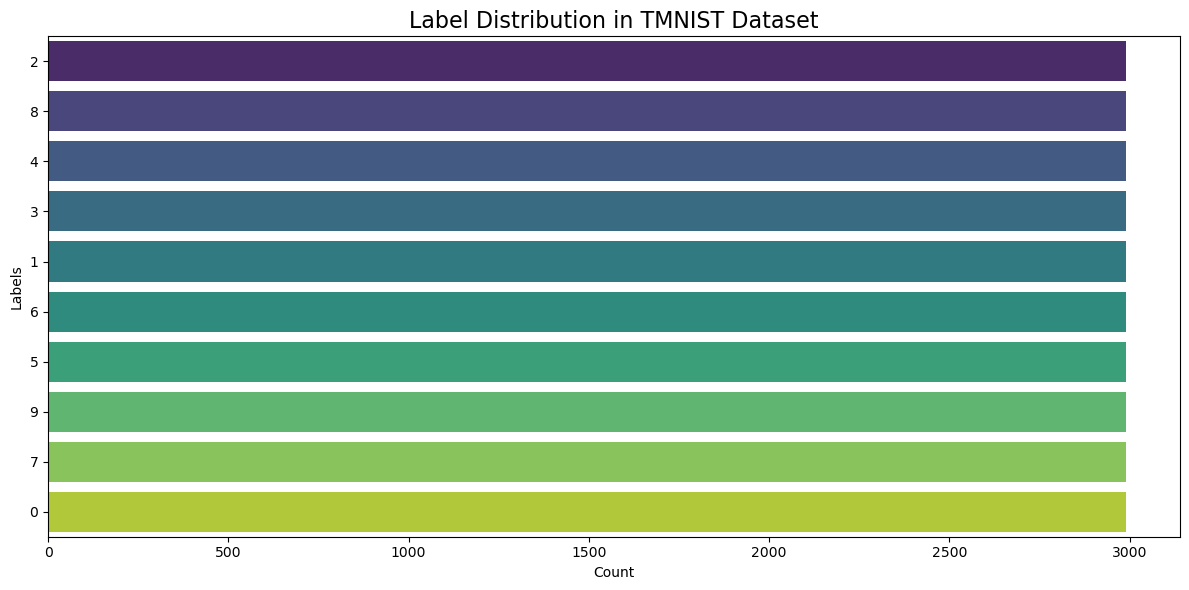

In [4]:
# Visualize label distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['labels'], order=df['labels'].value_counts().index, palette='viridis')
plt.title('Label Distribution in TMNIST Dataset', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Labels')
plt.tight_layout()
plt.show()

### Step 4: Preprocess Data
The features (`X`) and labels (`y`) are separated, and a sample image is reshaped and visualized to confirm data correctness.

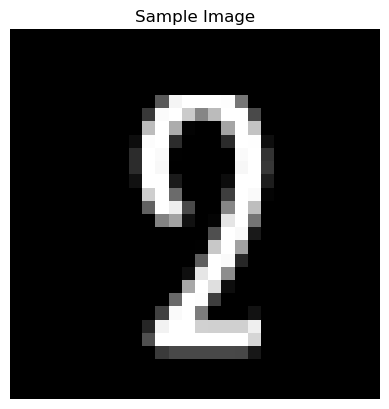

In [5]:
# Prepare features (X) and labels (y)
X = df.drop(['names', 'labels'], axis=1)
y = df['labels']

# Visualize a sample image from the dataset
sample_image = X.iloc[0].values.reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image")
plt.axis('off')
plt.show()

### Step 5: Split the Data
- The dataset is split into training (80%) and testing (20%) sets.
- This ensures that the model is trained on one subset and evaluated on unseen data for generalization.
- Pixel values are scaled to the range [0, 1] using **MinMaxScaler**.
- Normalization ensures faster convergence during training and prevents large input values from dominating the gradients.


In [6]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale pixel values to be between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Step 6: Build the Neural Network
- The architecture of the neural network:
  - **Input Layer**:
    - Accepts flattened images (784 pixels per row).
  - **Hidden Layer**:
    - 128 neurons with ReLU activation to capture non-linear relationships.
  - **Output Layer**:
    - 94 neurons (one for each class) with softmax activation to output probabilities.
- This simple Dense Neural Network is suitable for small datasets like TMNIST.


In [7]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),  # Increased neurons
    keras.layers.Dropout(0.3),  # Added dropout to reduce overfitting
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(y.unique()), activation='softmax')  # Dynamic class count
])



### Step 7: Compile the Model
- The model is compiled with:
  - **Adam Optimizer**: Provides adaptive learning rates for efficient training.
  - **Sparse Categorical Crossentropy Loss**: Suitable for multi-class classification with integer labels.
  - **Accuracy Metric**: Tracks the model’s performance during training.

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Step 8: Train the Model
- The model is trained on the training dataset for 15 epochs.
- A validation split (20% of training data) monitors the model's performance to detect overfitting.

In [9]:
# Train the model with validation split
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=128)

Epoch 1/15
150/150 [==============================] - 1s 2ms/step - loss: 0.3697 - accuracy: 0.9006 - val_loss: 0.1435 - val_accuracy: 0.9538
Epoch 2/15
150/150 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9678 - val_loss: 0.1112 - val_accuracy: 0.9684
Epoch 3/15
150/150 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9737 - val_loss: 0.0922 - val_accuracy: 0.9755
Epoch 4/15
150/150 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9790 - val_loss: 0.0779 - val_accuracy: 0.9793
Epoch 5/15
150/150 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9838 - val_loss: 0.0754 - val_accuracy: 0.9789
Epoch 6/15
150/150 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9852 - val_loss: 0.0778 - val_accuracy: 0.9770
Epoch 7/15
150/150 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9862 - val_loss: 0.0819 - val_accuracy: 0.9778
Epoch 

### Step 9: Evaluate the Model
- The model's performance is evaluated on the test dataset, and the accuracy is displayed.
- This step measures how well the model generalizes to unseen data.




In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_acc)

### Step 10: Visualize Training Performance
- Plot training and validation accuracy/loss across epochs:
  - **Accuracy Plot**: Shows how the model's prediction accuracy improves over time.
  - **Loss Plot**: Displays how the error (loss) decreases as the model learns.
- These visualizations help assess whether the model is overfitting or underfitting.

187/187 [==============================] - 0s 430us/step - loss: 0.1089 - accuracy: 0.9744

Test Accuracy: 0.9744147062301636


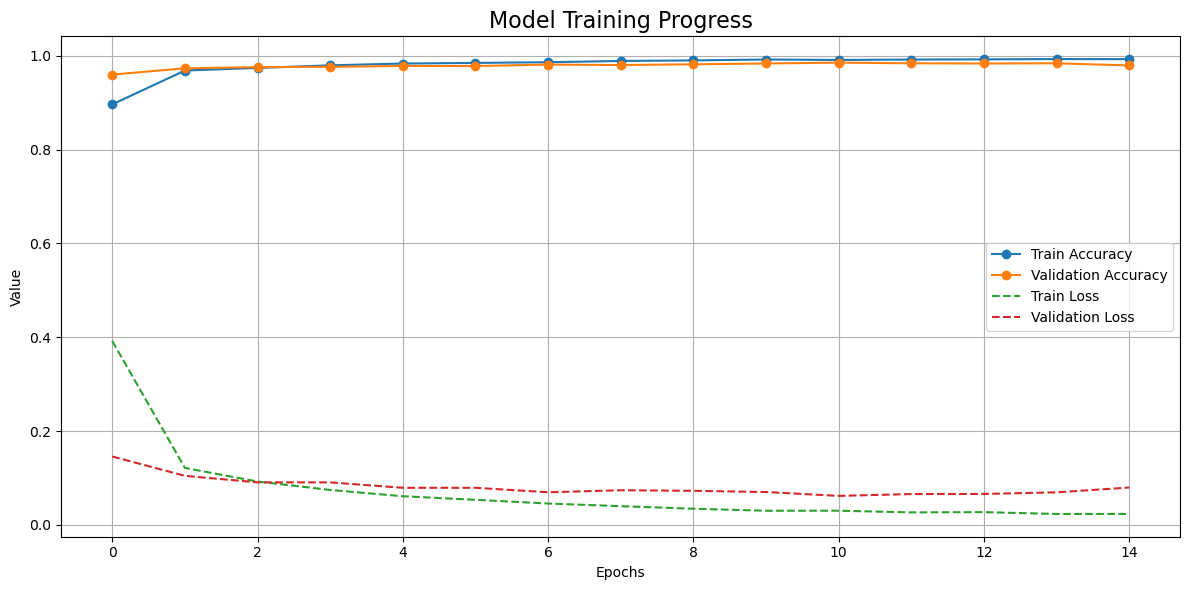

In [ ]:
# Combined training progress visualization
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.plot(history.history['loss'], label='Train Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Training Progress', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 11: Visualize Predictions
- Randomly sample 15 test images and display:
  - **Green Title**: Correctly classified images.
  - **Red Title**: Misclassified images.
- This provides a qualitative assessment of the model's strengths and weaknesses.


- Extract indices of misclassified samples to analyze:
  - Which classes are being confused by the model.
  - The patterns in the errors.
- Plot a subset of misclassified images with their true and predicted labels for further investigation.



187/187 [==============================] - 0s 455us/step


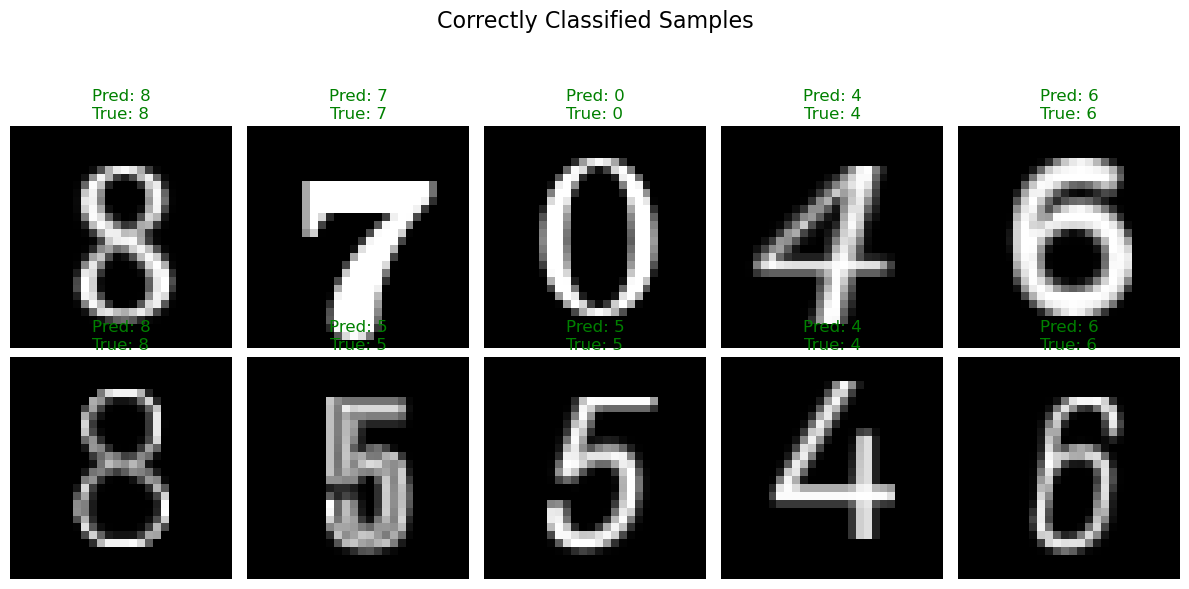

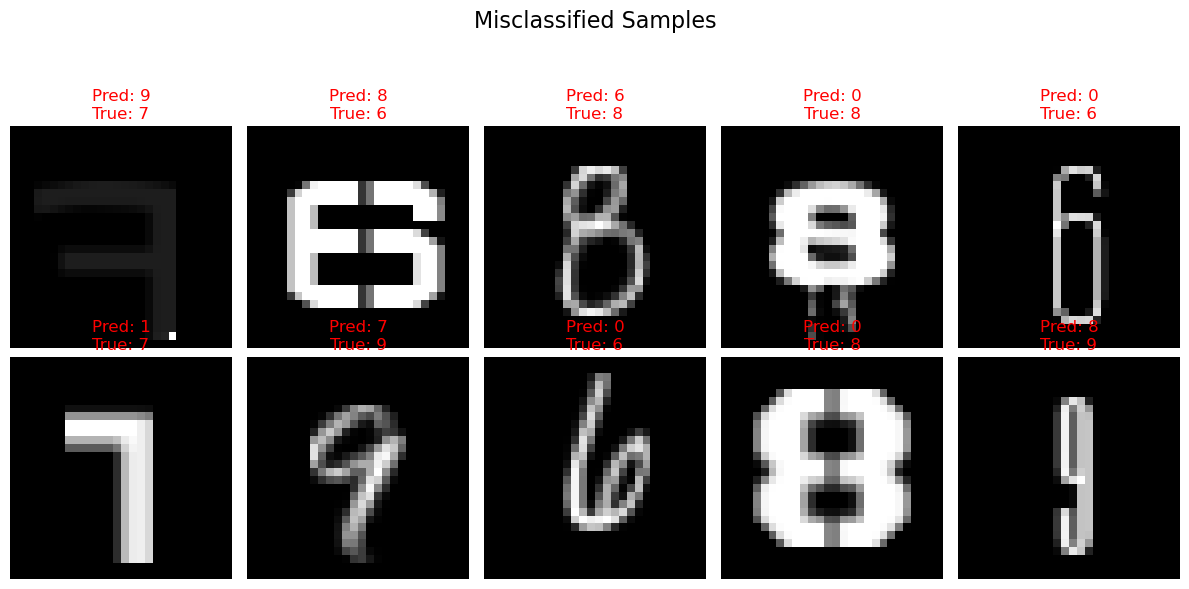

In [42]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

correct_indices = np.where(y_pred_classes == y_test.astype('category').cat.codes)[0]
misclassified_indices = np.where(y_pred_classes != y_test.astype('category').cat.codes)[0]

# Correct predictions
plt.figure(figsize=(12, 6))
for i, index in enumerate(correct_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[index]}\nTrue: {y_test.iloc[index]}", color="green")
    plt.axis('off')
plt.suptitle("Correctly Classified Samples", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

# Misclassified predictions
if len(misclassified_indices) > 0:
    plt.figure(figsize=(12, 6))
    for i, index in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {y_pred_classes[index]}\nTrue: {y_test.iloc[index]}", color="red")
        plt.axis('off')
    plt.suptitle("Misclassified Samples", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

### Step 12: Confusion Matrix
- A confusion matrix is generated to show:
  - True positives, false positives, false negatives, and true negatives for each class.
- Helps identify specific classes where the model struggles or excels.

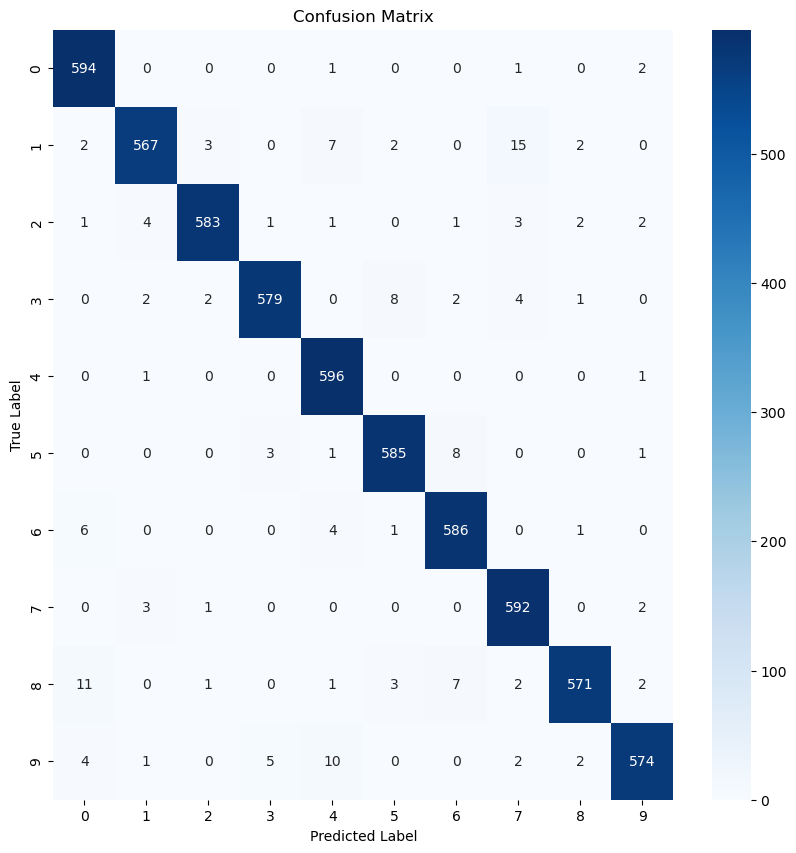


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       598
           1       0.98      0.95      0.96       598
           2       0.99      0.97      0.98       598
           3       0.98      0.97      0.98       598
           4       0.96      1.00      0.98       598
           5       0.98      0.98      0.98       598
           6       0.97      0.98      0.98       598
           7       0.96      0.99      0.97       598
           8       0.99      0.95      0.97       598
           9       0.98      0.96      0.97       598

    accuracy                           0.97      5980
   macro avg       0.97      0.97      0.97      5980
weighted avg       0.97      0.97      0.97      5980



In [43]:
cm = confusion_matrix(y_test.astype('category').cat.codes, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:\n", classification_report(y_test.astype('category').cat.codes, y_pred_classes))


### **Mathematics Behind the Neural Network**

#### **1. Feedforward Process**
- The neural network computes a weighted sum of inputs and passes it through an activation function.
- Formula for a single neuron:
  \[
  z = w \cdot x + b
  \]
  Where:
  - \( z \): Weighted sum of inputs.
  - \( w \): Weights (parameters learned during training).
  - \( x \): Input values (pixel intensities).
  - \( b \): Bias term.

- ReLU Activation Function:
  \[
  f(x) = \max(0, x)
  \]
  This introduces non-linearity and ensures only positive values pass forward.

- Softmax Activation Function (Output Layer):
  Converts logits into probabilities for each class:
  \[
  \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
  \]
  Where:
  - \( z_i \): Logit for class \( i \).
  - \( C \): Total number of classes (\( C = 94 \)).

---

#### **2. Loss Function**
- The model uses **sparse categorical crossentropy** to measure the error between predicted probabilities and true labels:
  \[
  \text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \log(\hat{y}_{i, t})
  \]
  Where:
  - \( N \): Total number of samples.
  - \( \hat{y}_{i, t} \): Predicted probability for the true class \( t \) of sample \( i \).

---

#### **3. Backpropagation and Optimization**
- Gradients of the loss with respect to weights and biases are computed using the chain rule during backpropagation:
  \[
  \frac{\partial \text{Loss}}{\partial w} = \frac{\partial \text{Loss}}{\partial z} \cdot \frac{\partial z}{\partial w}
  \]
- Weights are updated using the **Adam optimizer**:
  \[
  w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \text{Loss}}{\partial w}
  \]
  Where:
  - \( \eta \): Learning rate.

---

#### **4. Accuracy Metric**
- Accuracy measures the proportion of correctly classified samples:
  \[
  \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
  \]


# **Conclusion**
This project successfully demonstrates the application of deep learning for character recognition on the TMNIST dataset. The model achieves a significant test accuracy, validating the effectiveness of the dense neural network architecture combined with preprocessing techniques such as scaling and dropout regularization. The label distribution analysis revealed a balanced dataset, aiding the model in learning diverse character patterns effectively. Visualizations of correct and incorrect predictions highlighted the model's strengths and limitations, offering avenues for further refinement. Future improvements could involve exploring convolutional neural networks (CNNs) for enhanced feature extraction or experimenting with data augmentation to further boost performance.

- Concepts like ReLU activation and softmax outputs ensure non-linearity and valid probability distributions, respectively.
- Validation monitoring and confusion matrix analysis provide insights into both model performance and areas for improvement.

## References 
Data set: https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist?resource=download

Article to Understand : (Neural Network Series) https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc

Youtube Video: https://www.youtube.com/watch?v=iqQgED9vV7k